# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Baiocchi, Lucio (360244);
2. Passafiume, Leonardo (358616).

Now, fill the python list below with the Student IDs of the team

In [1]:
StudentIDs = [360244,358616]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Smoking
Alcohol
Healthy eating
Psychology
Politics
Internet
PC
Chemistry
Reading
Geography
Medicine
Art exhibitions
Religion
Countryside, outdoors
Dancing
Writing
Active sport
Gardening
Celebrities
Science and technology
Theatre
Fun with friends
Adrenaline sports
Movies
Horror
Thriller
Comedy
Sci-fi
Animated
Documentary
Western
Slow songs or fast songs
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Alternative
Opera
Writing notes
Workaholism
Thinking ahead
Final judgement
Loss of interest
Funniness
Fake
Criminal damage
Decision making
Judgment calls
Hypochondria
Empathy
Giving
Compassion to animals
Loneliness
Cheating in school
Changing the past
Dreams
Charity
Lying
Waiting
New environment
Mood swings
Socializing
Children
Assertiveness
Getting angry
Knowing the right

,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,Psychology,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
610,3,4,3,3,3,5,tried smoking,social drinker,3,3,...,24,160,55,1,female,right,college/bachelor degree,no,city,block of flats
52,3,3,2,2,4,5,tried smoking,social drinker,3,2,...,20,183,83,1,male,right,secondary school,no,village,house/bungalow
479,3,4,5,4,3,3,tried smoking,social drinker,3,4,...,21,171,60,2,female,right,secondary school,no,village,house/bungalow
123,3,5,1,5,5,1,tried smoking,social drinker,1,4,...,20,180,71,0,female,right,secondary school,yes,city,block of flats
75,4,2,2,2,3,4,never smoked,social drinker,3,4,...,18,162,50,1,female,left,secondary school,no,city,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,5,4,3,4,3,4,tried smoking,social drinker,4,2,...,20,167,57,2,female,right,college/bachelor degree,no,village,house/bungalow
115,4,1,4,4,1,4,never smoked,drink a lot,3,2,...,25,177,97,1,male,left,doctorate degree,yes,city,block of flats
207,3,4,3,4,4,4,former smoker,social drinker,4,3,...,19,180,57,1,female,right,secondary school,yes,city,house/bungalow
342,2,2,2,2,2,3,tried smoking,social drinker,4,5,...,28,171,57,1,female,right,masters degree,no,city,block of flats



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,Psychology,...,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
610,3,4,3,3,3,5,tried smoking,social drinker,3,3,...,1,1,1,1,1,1,1,2,4,2
52,3,3,2,2,4,5,tried smoking,social drinker,3,2,...,3,2,3,5,1,3,2,1,1,3
479,3,4,5,4,3,3,tried smoking,social drinker,3,4,...,1,1,4,1,5,4,2,3,4,3
123,3,5,1,5,5,1,tried smoking,social drinker,1,4,...,1,1,1,1,1,1,1,2,2,1
75,4,2,2,2,3,4,never smoked,social drinker,3,4,...,2,2,3,3,5,2,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,5,4,3,4,3,4,tried smoking,social drinker,4,2,...,1,1,1,2,2,2,2,3,3,2
115,4,1,4,4,1,4,never smoked,drink a lot,3,2,...,1,1,1,5,1,1,1,1,5,2
207,3,4,3,4,4,4,former smoker,social drinker,4,3,...,2,2,3,3,5,5,2,4,3,3
342,2,2,2,2,2,3,tried smoking,social drinker,4,5,...,3,4,3,4,5,4,3,4,5,2



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
610,24,160,55,1,female,right,college/bachelor degree,no,city,block of flats
52,20,183,83,1,male,right,secondary school,no,village,house/bungalow
479,21,171,60,2,female,right,secondary school,no,village,house/bungalow
123,20,180,71,0,female,right,secondary school,yes,city,block of flats
75,18,162,50,1,female,left,secondary school,no,city,house/bungalow
...,...,...,...,...,...,...,...,...,...,...
286,20,167,57,2,female,right,college/bachelor degree,no,village,house/bungalow
115,25,177,97,1,male,left,doctorate degree,yes,city,block of flats
207,19,180,57,1,female,right,secondary school,yes,city,house/bungalow
342,28,171,57,1,female,right,masters degree,no,city,block of flats


## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [3]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import math


## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [4]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
We will apply the ordinal encoding for the features that are not numerical value, i.e. : smoking, alcohol, lying. 
We chose an ascending order: it starts from never and increase.

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
The ordinal encoding, that we will apply, will transform the value from strings to numerical values. Then we will use the standard scaler to scale the values and obtaining mean = 0 and variance = 1

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [5]:
responses_ft_enc = responses_ft.copy()

# Smoking feature
categories_order = [['never smoked', 'tried smoking', 'former smoker', 'current smoker']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Smoking'] = oe.fit_transform(responses_ft_enc[['Smoking']])

# Alcohol feature
categories_order = [['never', 'social drinker', 'drink a lot']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Alcohol'] = oe.fit_transform(responses_ft_enc[['Alcohol']])

# Lying feature
categories_order = [['never', 'only to avoid hurting someone', 'sometimes', 'everytime it suits me']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Lying'] = oe.fit_transform(responses_ft_enc[['Lying']])

In [6]:
scaler = StandardScaler()
responses_ft_pp = scaler.fit_transform(responses_ft_enc)
responses_ft_pp = pd.DataFrame(data=responses_ft_pp, columns=responses_ft_enc.columns)


display(responses_ft[['Smoking', 'Alcohol', 'Lying']])
display(responses_ft_enc[['Smoking', 'Alcohol', 'Lying']])
display(responses_ft_pp[['Smoking', 'Alcohol', 'Lying']])

,Smoking,Alcohol,Lying
610,tried smoking,social drinker,only to avoid hurting someone
52,tried smoking,social drinker,sometimes
479,tried smoking,social drinker,never
123,tried smoking,social drinker,everytime it suits me
75,never smoked,social drinker,only to avoid hurting someone
...,...,...,...
286,tried smoking,social drinker,only to avoid hurting someone
115,never smoked,drink a lot,everytime it suits me
207,former smoker,social drinker,only to avoid hurting someone
342,tried smoking,social drinker,sometimes


,Smoking,Alcohol,Lying
610,1.0,1.0,1.0
52,1.0,1.0,2.0
479,1.0,1.0,0.0
123,1.0,1.0,3.0
75,0.0,1.0,1.0
...,...,...,...
286,1.0,1.0,1.0
115,0.0,2.0,3.0
207,2.0,1.0,1.0
342,1.0,1.0,2.0


,Smoking,Alcohol,Lying
0,-0.312067,-0.223601,-1.095814
1,-0.312067,-0.223601,0.304393
2,-0.312067,-0.223601,-2.496021
3,-0.312067,-0.223601,1.704600
4,-1.305184,-0.223601,-1.095814
...,...,...,...
501,-0.312067,-0.223601,-1.095814
502,-1.305184,1.544247,1.704600
503,0.681051,-0.223601,-1.095814
504,-0.312067,-0.223601,0.304393


#### Comment the results obtained after the preprocessing operation (max 100 words):
Now all the features are represented by numerical values scaled to have mean = 0 and variance = 1. By doing this none of the features will predominate over the others and all of them will have the same wheight.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

In [11]:
# [write the code here]
first_to_print = 5
variance_enc = responses_ft_enc.var()
variance_pp = responses_ft_pp.var()
sorted_variance_enc = variance_enc.sort_values(ascending = False)
sorted_variance_pp = variance_pp.sort_values(ascending = False)
#print(variance_enc[:first_to_print])
#print(variance_pp[:first_to_print])
#print(sorted_variance_enc[:first_to_print])

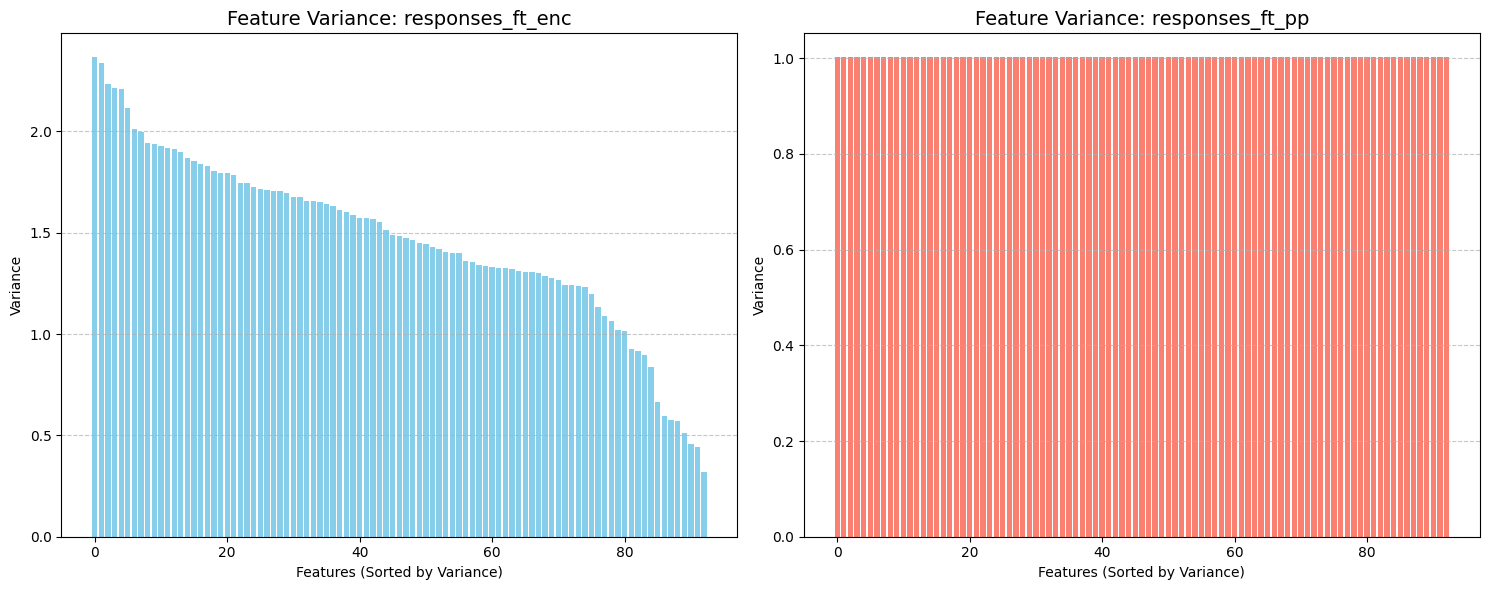

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for responses_ft_enc
axes[0].bar(range(len(sorted_variance_enc)), sorted_variance_enc.values, color='skyblue')
axes[0].set_title('Feature Variance: responses_ft_enc', fontsize=14)
axes[0].set_xlabel('Features (Sorted by Variance)')
axes[0].set_ylabel('Variance')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for responses_ft_pp
axes[1].bar(range(len(sorted_variance_pp)), sorted_variance_pp.values, color='salmon')
axes[1].set_title('Feature Variance: responses_ft_pp', fontsize=14)
axes[1].set_xlabel('Features (Sorted by Variance)')
axes[1].set_ylabel('Variance')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Comment the results obtained for the variances (max 150 words):
The two charts illustrate the effect of feature scaling.

- Left Chart (responses_ft_enc): This plot displays heterogeneous variances, with values descending from approximately 2.3 down to 0.3. This indicates that in the _enc (encoded) dataset, features are on different scales or have different natural distributions. Without normalization, the features with higher variance could disproportionately influence distance-based machine learning models.

- Right Chart (responses_ft_pp): This plot shows uniform variance, where every feature has a variance of exactly 1.0. This confirms that the _pp (pre-processed) dataset has undergone Standardization (Z-score normalization). This technique rescales features to have a mean of 0 and a standard deviation (and variance) of 1, ensuring all features contribute equally to the model's objective function.

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

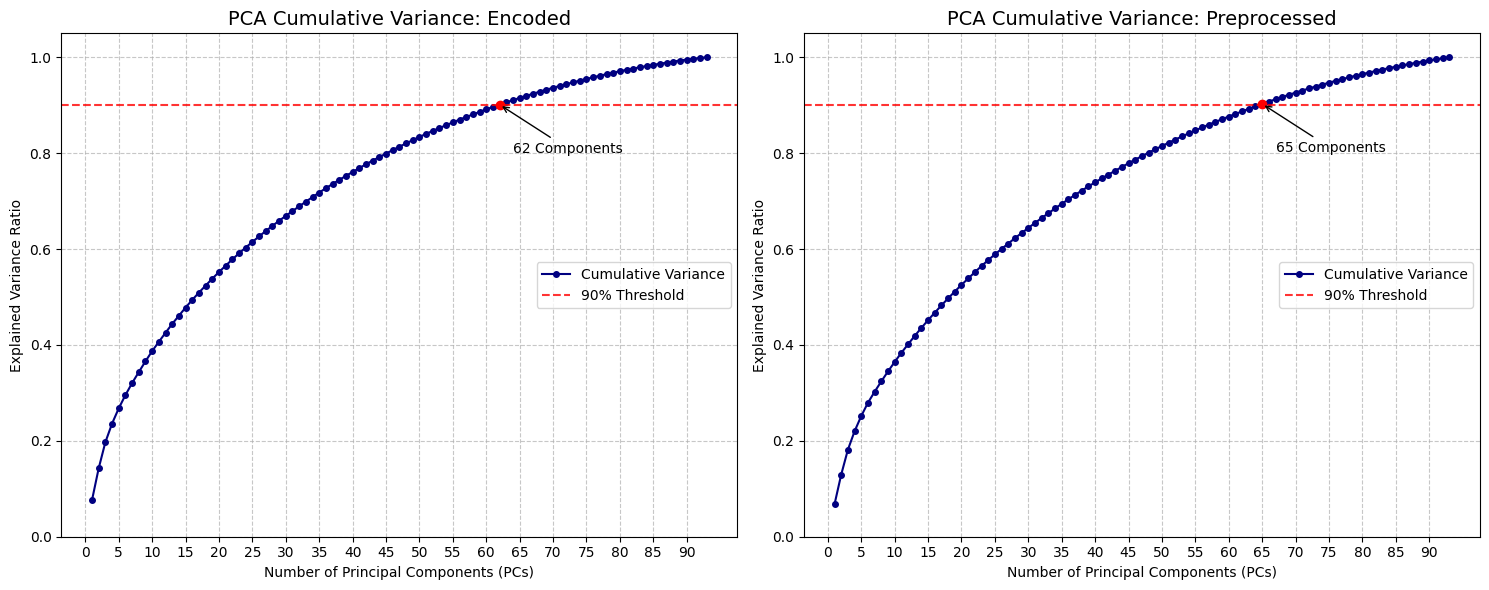

In [13]:
def plot_pca_cumulative(data, title, ax):
    # 1. Fit PCA
    pca = PCA()
    pca.fit(data)
    
    # 2. Calculations
    exp_var = pca.explained_variance_ratio_
    cum_var = np.cumsum(exp_var)
    n_components = len(exp_var)
    x = np.arange(1, n_components + 1)
    
    #ax.bar(x, exp_var, alpha=0.6, color='skyblue', label='Individual Variance', align='center')
    ax.plot(x, cum_var, marker='o', linestyle='-', markersize=4, color='navy', label='Cumulative Variance')
    threshold = 0.90
    ax.axhline(y=threshold, color='r', linestyle='--', alpha=0.8, label=f'{int(threshold*100)}% Threshold')
    
    # first component crossing 90%
    idx_threshold = np.argmax(cum_var >= threshold) 
    val_threshold = x[idx_threshold] 
    
    # Draw point and text
    ax.plot(val_threshold, cum_var[idx_threshold], 'ro') 
    ax.annotate(f'{val_threshold} Components', 
                xy=(val_threshold, cum_var[idx_threshold]), 
                xytext=(val_threshold + 2, cum_var[idx_threshold] - 0.1),
                arrowprops=dict(arrowstyle="->", color='black'))
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Number of Principal Components (PCs)')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_ylim(0, 1.05)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # X-axis ticks management
    if n_components > 20:
        ax.set_xticks(np.arange(0, n_components + 1, 5))
    else:
        ax.set_xticks(x)

    ax.legend(loc='center right')
    return pca

# Create figure for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Run and plot for Encoded dataset
pca_enc = plot_pca_cumulative(responses_ft_enc, 'PCA Cumulative Variance: Encoded', axes[0])

# Run and plot for Preprocessed dataset
pca_pp = plot_pca_cumulative(responses_ft_pp, 'PCA Cumulative Variance: Preprocessed', axes[1])

plt.tight_layout()
plt.show()

# This visualization help to decide how many components are needed to explain a 
# specific percentage of the data's variability.

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

The Encoded dataset requires 62 components to explain 90% of the variance, while the Preprocessed dataset requires slightly more, at 65 components.

This result is consistent with the effects of standardization. In the Encoded dataset, features with higher variances (up to ~2.3) naturally dominate the early principal components, allowing the model to capture "variance" faster and compress the data more efficiently.

Conversely, in the Preprocessed dataset, all feature variances are normalized to 1.0. Because the variance is more evenly distributed across all original dimensions, the Principal Components cannot rely on scale differences to capture large chunks of variance quickly. As a result, PCA requires more components to reach the same 90% information threshold, ensuring the retained components reflect true structural correlations rather than arbitrary scaling.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

In [18]:
# 1. Find m' (number of components needed for 33% variance)
# We use the full PCA computed in the previous step
cumulative_variance = np.cumsum(pca_pp.explained_variance_ratio_)
m_prime = np.argmax(cumulative_variance >= 0.33) + 1  # +1 because indices start at 0

m = min(m_prime, 5)

print(f"Components needed for 33% variance (m'): {m_prime}")
print(f"Selected dimension m = min({m_prime}, 5): {m}")

# 3. Compute new PCA for dimensionality reduction with m components
pca_reduced = PCA(n_components=m)
responses_ft_pp_reduced = pca_reduced.fit_transform(responses_ft_pp)

print(f"Original shape: {responses_ft_pp.shape}")
print(f"Reduced shape: {responses_ft_pp_reduced.shape}")

Components needed for 33% variance (m'): 9
Selected dimension m = min(9, 5): 5
Original shape: (506, 93)
Reduced shape: (506, 5)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/pyth

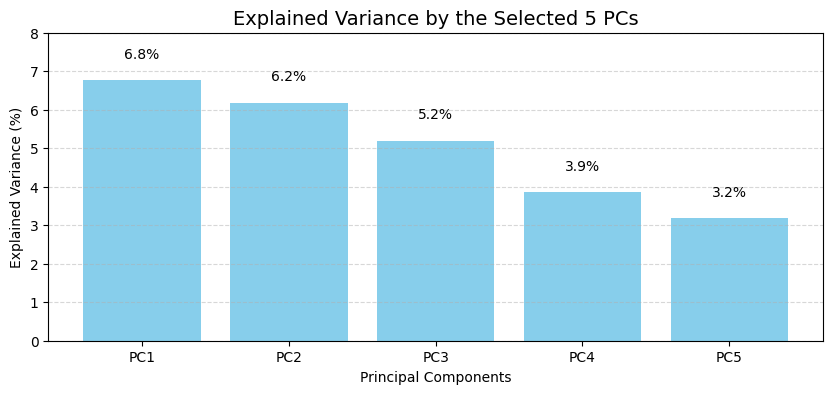


Total preserved explained variance by the 5 PCs: 25.17%


In [19]:
# 2. Visualize as a barplot the explained variance (as percentage) for each PC,
# and report the preserved explained variance (as percentage) by the $m$ PCs.

m_variances = pca_pp.explained_variance_ratio_[:m] * 100 # Convert to percentage
pc_labels = [f'PC{i+1}' for i in range(m)]
# 4. Visualization: Bar Plot
plt.figure(figsize=(10, 4))
bars = plt.bar(pc_labels, m_variances, color='skyblue')

# Add text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.title(f'Explained Variance by the Selected {m} PCs', fontsize=14)
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 8)
plt.show()

# 5. Report Preserved Variance
total_preserved = np.sum(m_variances)
print(f"\nTotal preserved explained variance by the {m} PCs: {total_preserved:.2f}%")

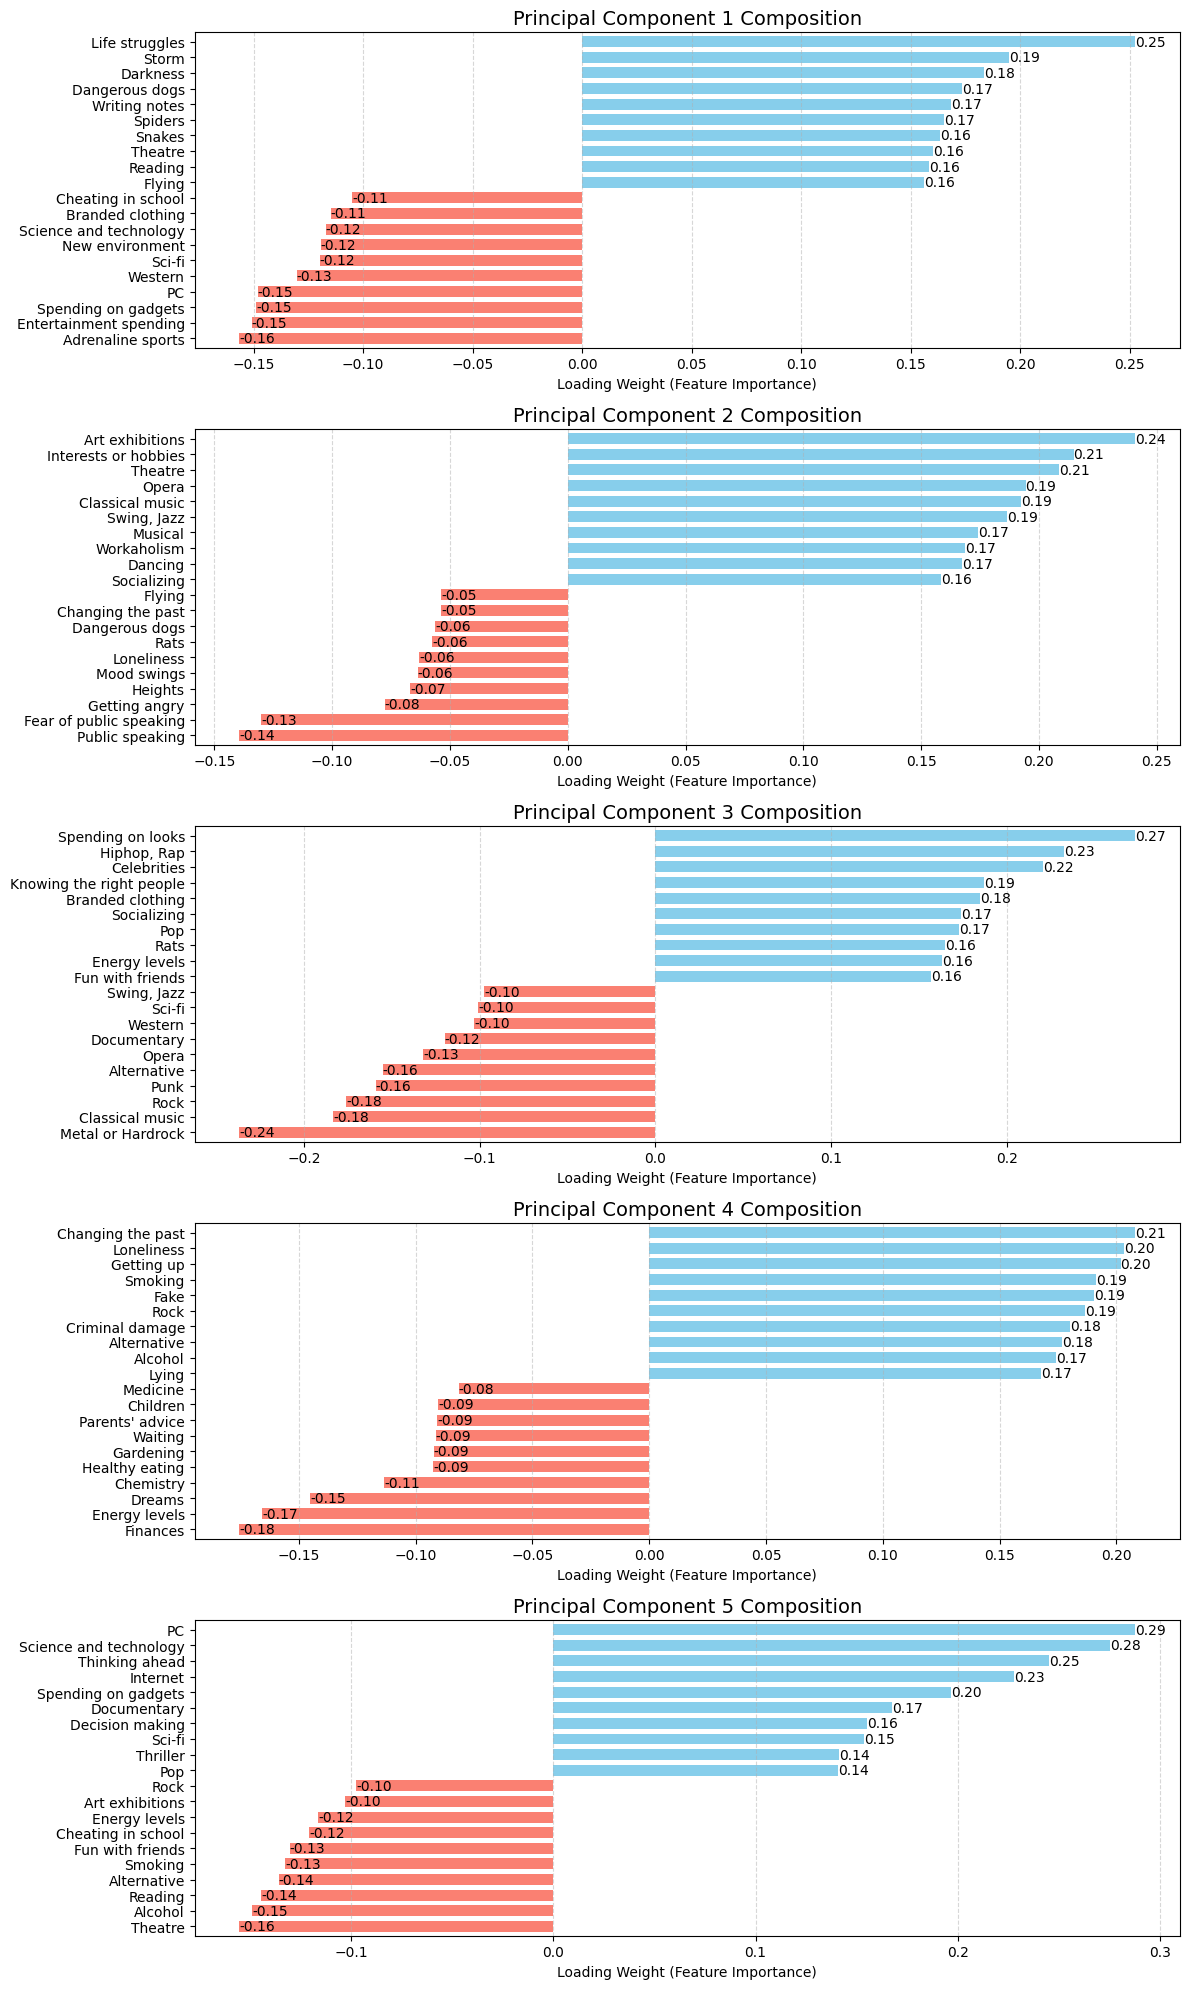

Index(['Finances', 'Branded clothing', 'Entertainment spending',
       'Spending on looks', 'Spending on gadgets',
       'Spending on healthy eating', 'Smoking', 'Alcohol', 'Healthy eating',
       'Psychology', 'Politics', 'Internet', 'PC', 'Chemistry', 'Reading',
       'Geography', 'Medicine', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Writing', 'Active sport',
       'Gardening', 'Celebrities', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Movies', 'Horror', 'Thriller',
       'Comedy', 'Sci-fi', 'Animated', 'Documentary', 'Western',
       'Slow songs or fast songs', 'Classical music', 'Musical', 'Pop', 'Rock',
       'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
       'Swing, Jazz', 'Alternative', 'Opera', 'Writing notes', 'Workaholism',
       'Thinking ahead', 'Final judgement', 'Loss of interest', 'Funniness',
       'Fake', 'Criminal damage', 'Decision making', 'Judgment calls',
       'Hy

In [20]:
# 3. Visualize all the PCs as barplots and give an 
# interpretation and a name to them, **motivating your choices**.
pcs = pca_reduced.components_[:m]
feature_names = responses_ft_pp.columns

def plot_pcs(pcs, features, m):
    fig, axes = plt.subplots(m, 1, figsize=(12, 4 * m))
    
    # If m=1, axes is not a list, so we make it one
    if m == 1: axes = [axes]
    
    for i in range(m):
        # Create a dataframe for the specific PC
        pc_loadings = pd.Series(pcs[i], index=features)
        
        # Sort to find the most influential features
        sorted_loadings = pc_loadings.sort_values()
        top_negative = sorted_loadings.head(m+5)
        top_positive = sorted_loadings.tail(m+5)
        
        # Combine them for plotting
        top_features = pd.concat([top_negative, top_positive])
        
        # Color coding: Red for negative, Blue for positive
        colors = ['salmon' if x < 0 else 'skyblue' for x in top_features.values]
        
        # Plot
        ax = axes[i]
        top_features.plot(kind='barh', ax=ax, color=colors, width=0.7)
        ax.set_title(f'Principal Component {i+1} Composition', fontsize=14)
        ax.set_xlabel('Loading Weight (Feature Importance)')
        ax.grid(axis='x', linestyle='--', alpha=0.5)
        
        # Add values to the bars for clarity
        for index, value in enumerate(top_features.values):
            ax.text(value, index, f'{value:.2f}', va='center')

    plt.tight_layout()
    plt.show()

# 3. Run the visualization
plot_pcs(pcs, feature_names, m)
print(feature_names)


#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

- **PC1**: Fear and Anxiety vs. Sensation-Seeking,
    - High Score: Correlates with Anxiety, Fobias (e.g., life struggles, snakes, flying) (up to $0.25$).
    - Low Score: Correlates with Rationality, Risk-Taking (e.g., adrenaline sports, science and technology, cheating in school) (down to $-0.15$)
- **PC2**: Culture and Arts vs. Social Inhibition
    - High Score: Interest in Classical/High Arts (e.g., theatre, opera, jazz, art exhibitions) (up to $0.24$).
    - Low Score: Associated with Social Fears (e.g., fear of public speaking, mood swings) (down to $-0.13$).
- **PC3**: Mainstream & Status vs. Alternative Subculture
    - High Score: Focus on Trendy, Mainstream Pop Culture, and Image (e.g., hip-hop, Pop, socializing, shopping) (up to $0.27$).
    - Low Score: Interest in Alternative Rock Music Genres (e.g., Metal or Hardrock, Punk, Alternative) (down to $-0.24$).
- **PC4**: Stability & Health vs. Distress & Trouble
    - High Score: Represents Stability and Healthy Lifestyle (e.g., healthy eating, finances, parents' advice) (up to $0.20$).
    - Low Score: Represents Emotional Distress and Problematic Behavior (e.g., criminal damage, sadness, changing the past) (down to $-0.17$).
- **PC5**: Technology & Science vs. Traditional Arts
    - High Score: Focus on Technology and Rational Media (e.g., science and technology, Internet, Documentary) (up to $0.29$).
    - Low Score: Associated with Traditional Arts (e.g., Theatre, Art exhibitions) and cheating in school (down to $-0.16$).

In [28]:
# 4. Transform the *responses_ft_pp* data into their $m$-dimensional 
# representation via PCA. Store the transformed data in the 
# variable *responses_ft_pca*;
responses_ft_pca = pca_reduced.fit_transform(responses_ft_pp)

# Verifica delle dimensioni (opzionale, ma consigliato per capire)
print(f"Dimensione originale: {responses_ft_pp.shape}")
print(f"Dimensione trasformata: {responses_ft_pca.shape}")

Dimensione originale: (506, 93)
Dimensione trasformata: (506, 5)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/pyth

#### Write the code for visualizing the score graph (with PC names on the axis):

Text(0.5, 0.92, 'Score Graph: Representation in the first 3 Latent Dimensions')

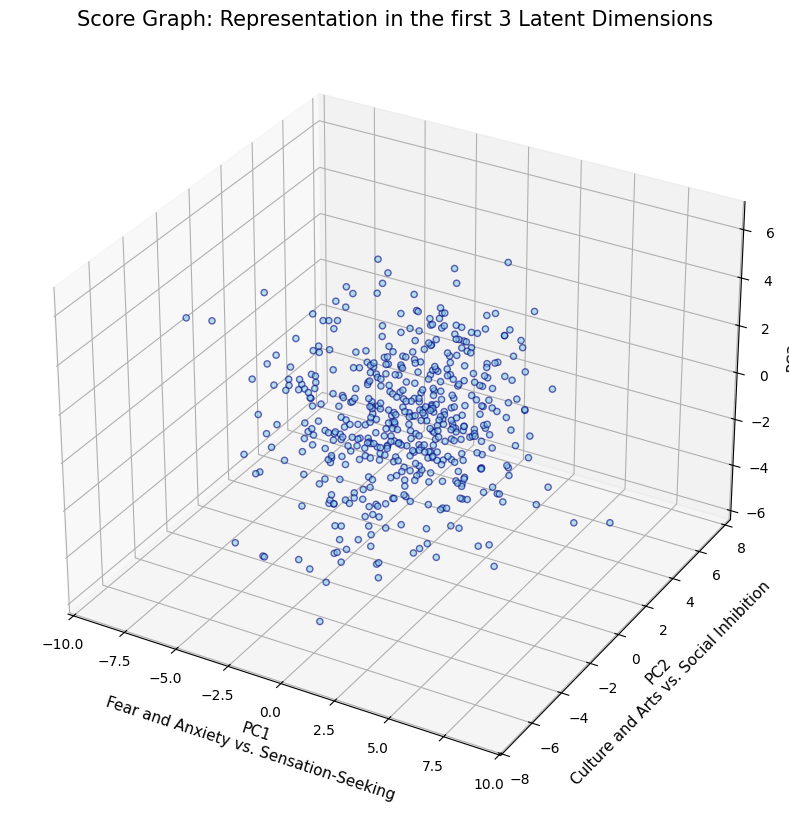

In [45]:
#%matplotlib widget
# 1. Define the names we gave to the PCs
pc_names = [
    "Fear and Anxiety vs. Sensation-Seeking",           # PC1
    "Culture and Arts vs. Social Inhibition",           # PC2
    "Mainstream & Status vs. Alternative Subculture",   # PC3
    "Stability & Health vs. Distress & Trouble",        # PC4
    "Technology & Science vs. Traditional Arts"         # PC5
]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Extract data for the first 3 components
xs = responses_ft_pca[:, 0]
ys = responses_ft_pca[:, 1]
zs = responses_ft_pca[:, 2]

# Create the scatter plot
# c='skyblue' sets the color, alpha=0.6 makes points semi-transparent to see overlapping
scatter = ax.scatter(xs, ys, zs, c='skyblue', edgecolor='navy', s=20, alpha=0.6)

# 3. Label the axes with the interpreted names
ax.set_xlabel(f"\nPC1\n{pc_names[0]}", fontsize=11) 
ax.set_ylabel(f"\nPC2\n{pc_names[1]}", fontsize=11)
ax.set_zlabel(f"\nPC3\n{pc_names[2]}", fontsize=11)

ax.set_title('Score Graph: Representation in the first 3 Latent Dimensions', fontsize=15)

#plt.show()


Il codice per il grafico 3D è stato migliorato per una maggiore leggibilità delle etichette e della profondità.


/var/folders/gw/h_3h_b5d74v_ds3nx7nhw4hh0000gn/T/ipykernel_77698/1366011394.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


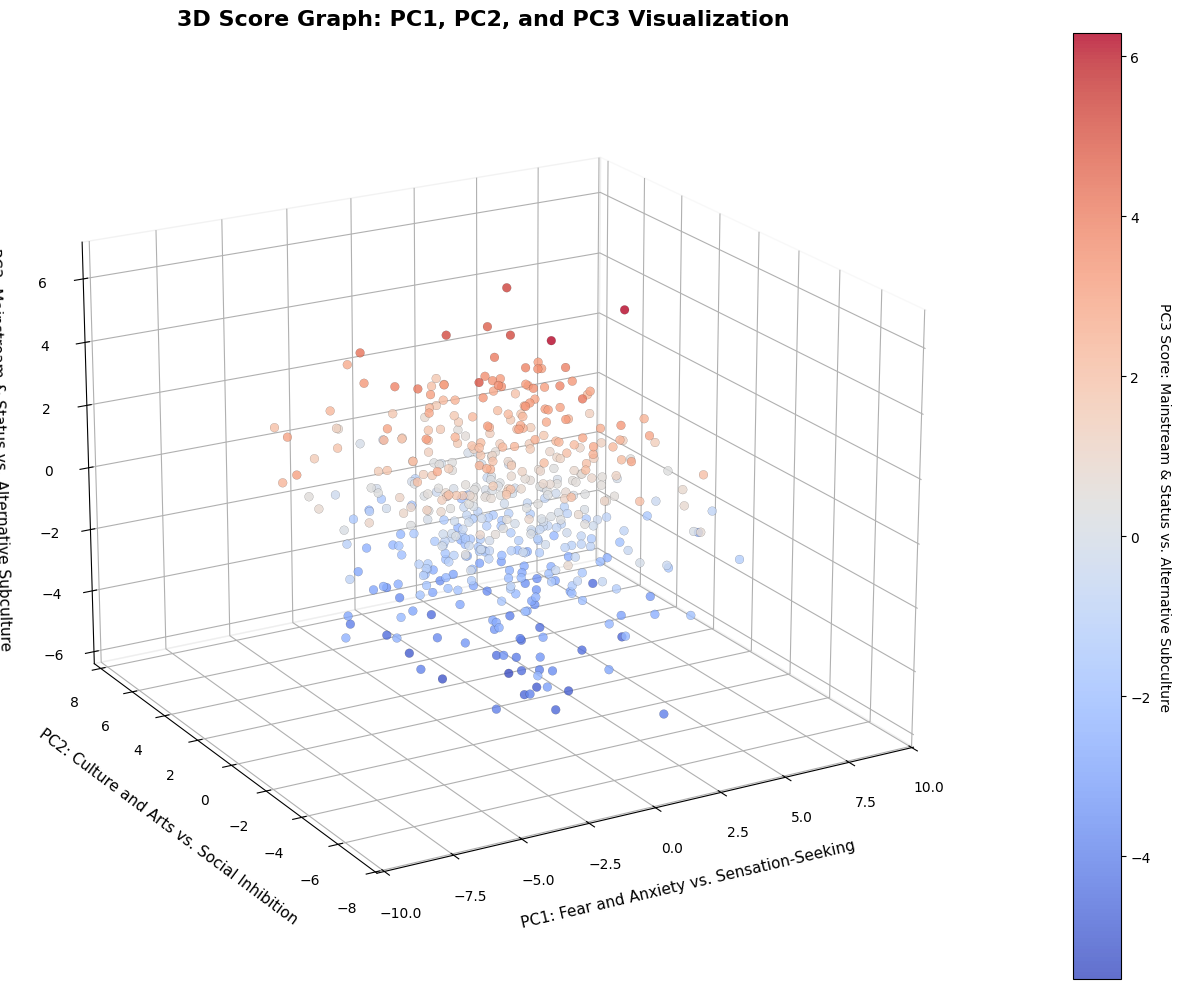

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 1. Define the names we gave to the PCs
pc_names = [
    "Fear and Anxiety vs. Sensation-Seeking",           # PC1
    "Culture and Arts vs. Social Inhibition",           # PC2
    "Mainstream & Status vs. Alternative Subculture",   # PC3
    "Stability & Health vs. Distress & Trouble",        # PC4
    "Technology & Science vs. Traditional Arts"         # PC5
]

# Create figure and 3D axes
fig = plt.figure(figsize=(15, 10)) # Aumenta la dimensione per più spazio
ax = fig.add_subplot(111, projection='3d')

# --- Dati ---
# Extract data for the first 3 components
xs = responses_ft_pca[:, 0]
ys = responses_ft_pca[:, 1]
# Z-axis data (used for depth positioning and coloring)
zs = responses_ft_pca[:, 2] 

# --- Miglioramenti di Leggibilità ---

# 1. Colore basato sulla Profondità (PC3 / Z-axis)
# Punti vicini (alto PC3) di un colore, punti lontani (basso PC3) di un altro.
cs = zs
cmap = plt.cm.get_cmap('coolwarm') 

# 2. Scatter Plot con Colore Gradiente di Profondità
scatter = ax.scatter(
    xs, ys, zs,
    c=cs,                # Colore basato su PC3
    cmap=cmap,           # Mappa colori 'coolwarm'
    s=40,                # Punti più grandi per visibilità
    alpha=0.8,           # Trasparenza ottimale
    edgecolor='k',       # Bordo nero sottile
    linewidth=0.1
)

# 3. Impostazioni degli Assi
ax.set_title('3D Score Graph: PC1, PC2, and PC3 Visualization', fontsize=16, fontweight='bold')

# Etichette degli Assi con Rotazione e allineamento (Cruciale per i nomi lunghi)
# PC1 (X-axis)
ax.set_xlabel(f"\nPC1: {pc_names[0]}", fontsize=11, labelpad=15)
ax.xaxis.label.set_rotation(20) # Ruota leggermente l'etichetta X
ax.tick_params(axis='x', pad=10)

# PC2 (Y-axis)
ax.set_ylabel(f"\nPC2: {pc_names[1]}", fontsize=11, labelpad=15)
ax.yaxis.label.set_rotation(-30) # Ruota l'etichetta Y
ax.tick_params(axis='y', pad=10)

# PC3 (Z-axis)
ax.set_zlabel(f"\nPC3: {pc_names[2]}", fontsize=11, labelpad=15)
ax.zaxis.label.set_rotation(90) # Ruota l'etichetta Z
ax.tick_params(axis='z', pad=10)

# 4. Angolo di Visualizzazione
# Angolo regolato per mostrare bene tutti e tre gli assi
ax.view_init(elev=20, azim=-120) 

# 5. Aggiungere la Barra dei Colori
# Essendo il colore legato a PC3, la color bar è essenziale
cbar = fig.colorbar(scatter, pad=0.08)
cbar.set_label(f"PC3 Score: {pc_names[2]}", rotation=270, labelpad=15, fontsize=10)

# 6. Sfondo Pulito
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True, linestyle=':', alpha=0.5) # Manteniamo una griglia chiara

plt.tight_layout()
#plt.show() 
print("Il codice per il grafico 3D è stato migliorato per una maggiore leggibilità delle etichette e della profondità.")

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

Optimal number of clusters (k): 4


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

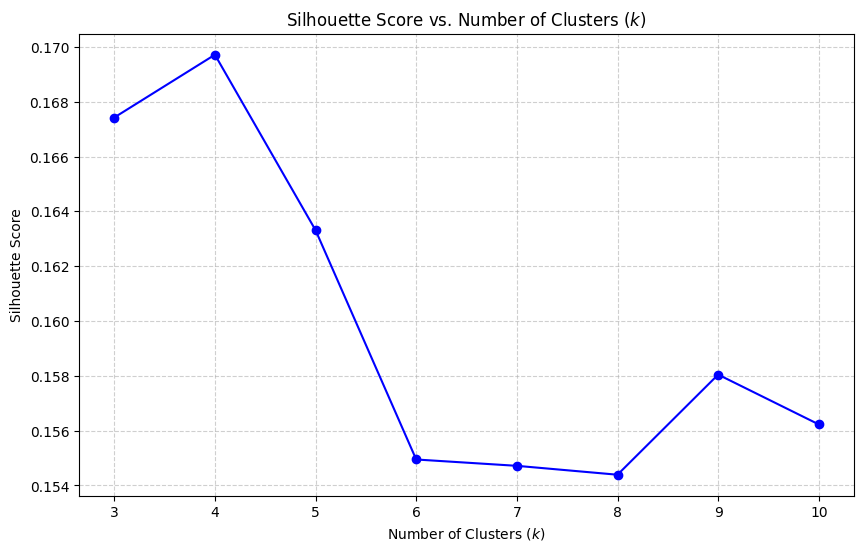

In [59]:
# ==========================================
# 1. Hyperparameter Tuning (Silhouette Score)
# ==========================================

silhouette_scores = []
k_values = range(3, 11)  # k from 3 to 10

# Calculate Silhouette Score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
    labels = kmeans.fit_predict(responses_ft_pca)
    
    score = silhouette_score(responses_ft_pca, labels)
    silhouette_scores.append(score)

# SILHOUETTE SCORE IS THE RESULT OF THIS FORMULA: 
#           (b - a)/max(a,b)
# where a is the distance from the point to all the other points in the same cluster: cohesion
# and b is the avg distance of the point to all the points in the nearest neighbour cluster: separation 

# Find the best k (highest score)
best_k_idx = np.argmax(silhouette_scores)
best_k = k_values[best_k_idx]

print(f"Optimal number of clusters (k): {best_k}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters ($k$)')
plt.xlabel('Number of Clusters ($k$)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/var/folders/gw/h_3h_b5d74v_ds3nx7nhw4hh0000gn/T/ipykernel_77698/1227810806.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


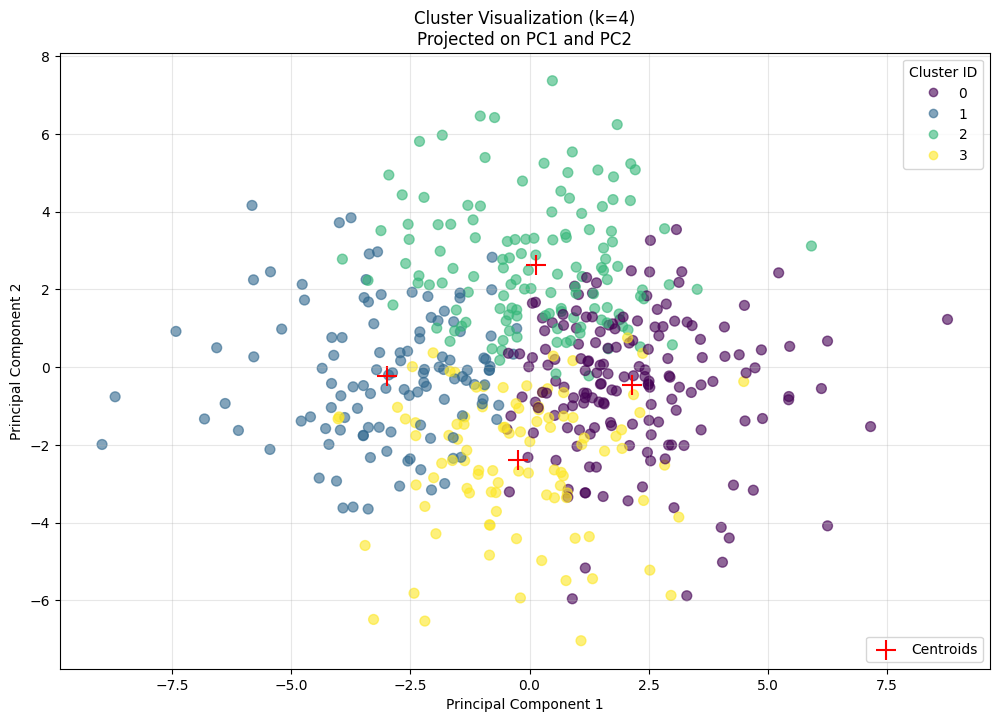

In [60]:
# Run k-Means with the best k
kmeans_final = KMeans(n_clusters=best_k, random_state=random_seed, n_init=10)
cluster_labels = kmeans_final.fit_predict(responses_ft_pca)
centroids = kmeans_final.cluster_centers_

plt.figure(figsize=(12, 8))

# Scatter plot: PC1 (column 0) vs PC2 (column 1)
# We use the array column indices 0 and 1
scatter = plt.scatter(
    responses_ft_pca[:, 0], 
    responses_ft_pca[:, 1], 
    c=cluster_labels, 
    cmap='viridis', 
    s=50, 
    alpha=0.6
)

# Overlay Centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    c='red', marker='+', s=200, edgecolors='black', linewidth=1.5, label='Centroids'
)

# create legend elements manually for the clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster ID", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc='lower right') # Legend for centroids

plt.title(f'Cluster Visualization (k={best_k})\nProjected on PC1 and PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

Il codice per il grafico 3D dei cluster K-Means su PC1, PC2 e PC3 è stato generato.


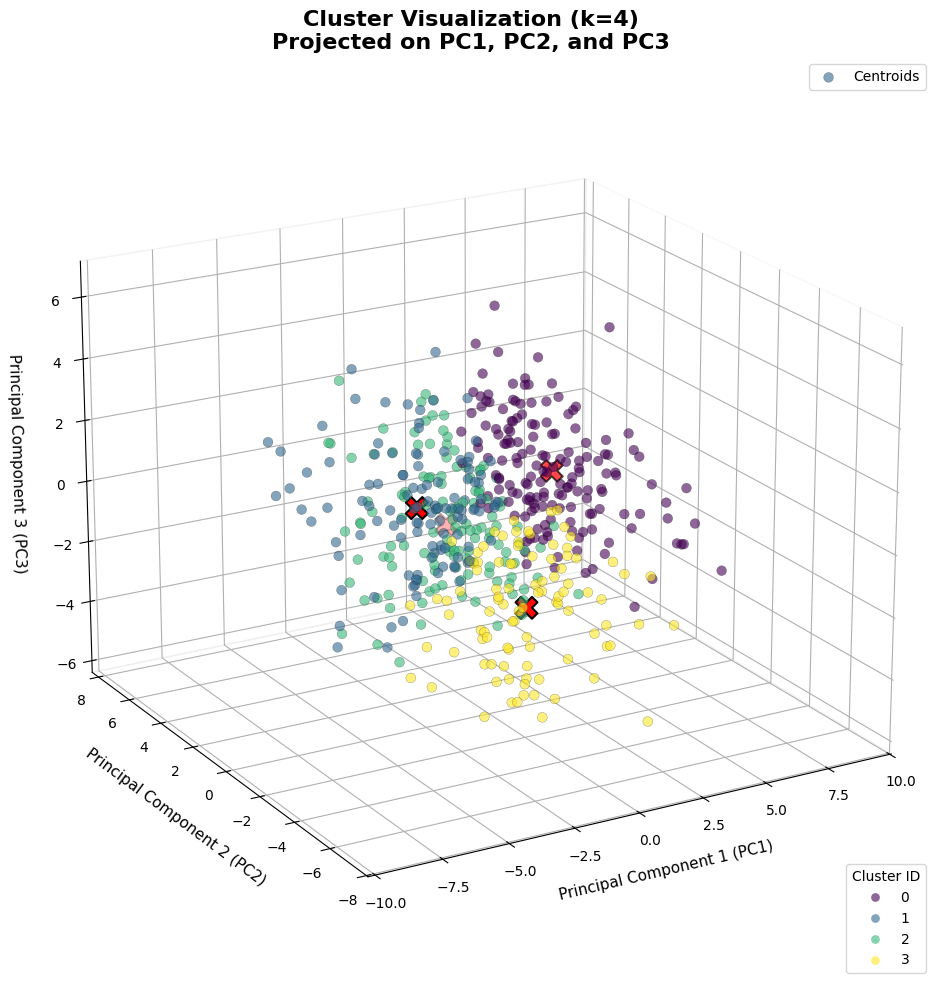

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Assumiamo che 'responses_ft_pca', 'cluster_labels', 'centroids', e 'best_k' siano definiti.

# Create figure and 3D axes
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# --- Dati ---
xs = responses_ft_pca[:, 0]
ys = responses_ft_pca[:, 1]
zs = responses_ft_pca[:, 2] # PC3

# --- Visualizzazione dei Cluster (Scatter Plot 3D) ---
# c=cluster_labels: La colorazione è basata sul cluster di appartenenza.
scatter = ax.scatter(
    xs, ys, zs,
    c=cluster_labels,          # Colore basato sull'ID del cluster
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolor='k',             # Bordo nero per i punti
    linewidth=0.2
)

# --- Overlay Centroidi 3D ---
ax.scatter(
    centroids[:, 0],           # PC1
    centroids[:, 1],           # PC2
    centroids[:, 2],           # PC3
    c='red',
    marker='X',                # Marker 'X' per distinguere i centroidi
    s=250,                     # Dimensione maggiore
    edgecolors='black',
    linewidth=1.5,
    label='Centroids'
)

# --- Titoli e Etichette ---
ax.set_title(f'Cluster Visualization (k={best_k})\nProjected on PC1, PC2, and PC3', fontsize=16, fontweight='bold')
ax.set_xlabel('Principal Component 1 (PC1)', fontsize=11, labelpad=10)
ax.set_ylabel('Principal Component 2 (PC2)', fontsize=11, labelpad=10)
ax.set_zlabel('Principal Component 3 (PC3)', fontsize=11, labelpad=10)

# --- Legenda ---
# Legenda per i cluster
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster ID", loc="lower right")
ax.add_artist(legend1)

# Legenda per i centroidi
ax.legend(['Centroids'], loc='upper right')

# --- Estetica (Opzionale) ---
ax.view_init(elev=20, azim=-120) # Regola l'angolo di visualizzazione
ax.grid(True, alpha=0.3)
ax.xaxis.pane.fill = False # Sfondo pulito
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.tight_layout()
#plt.show()
print("Il codice per il grafico 3D dei cluster K-Means su PC1, PC2 e PC3 è stato generato.")

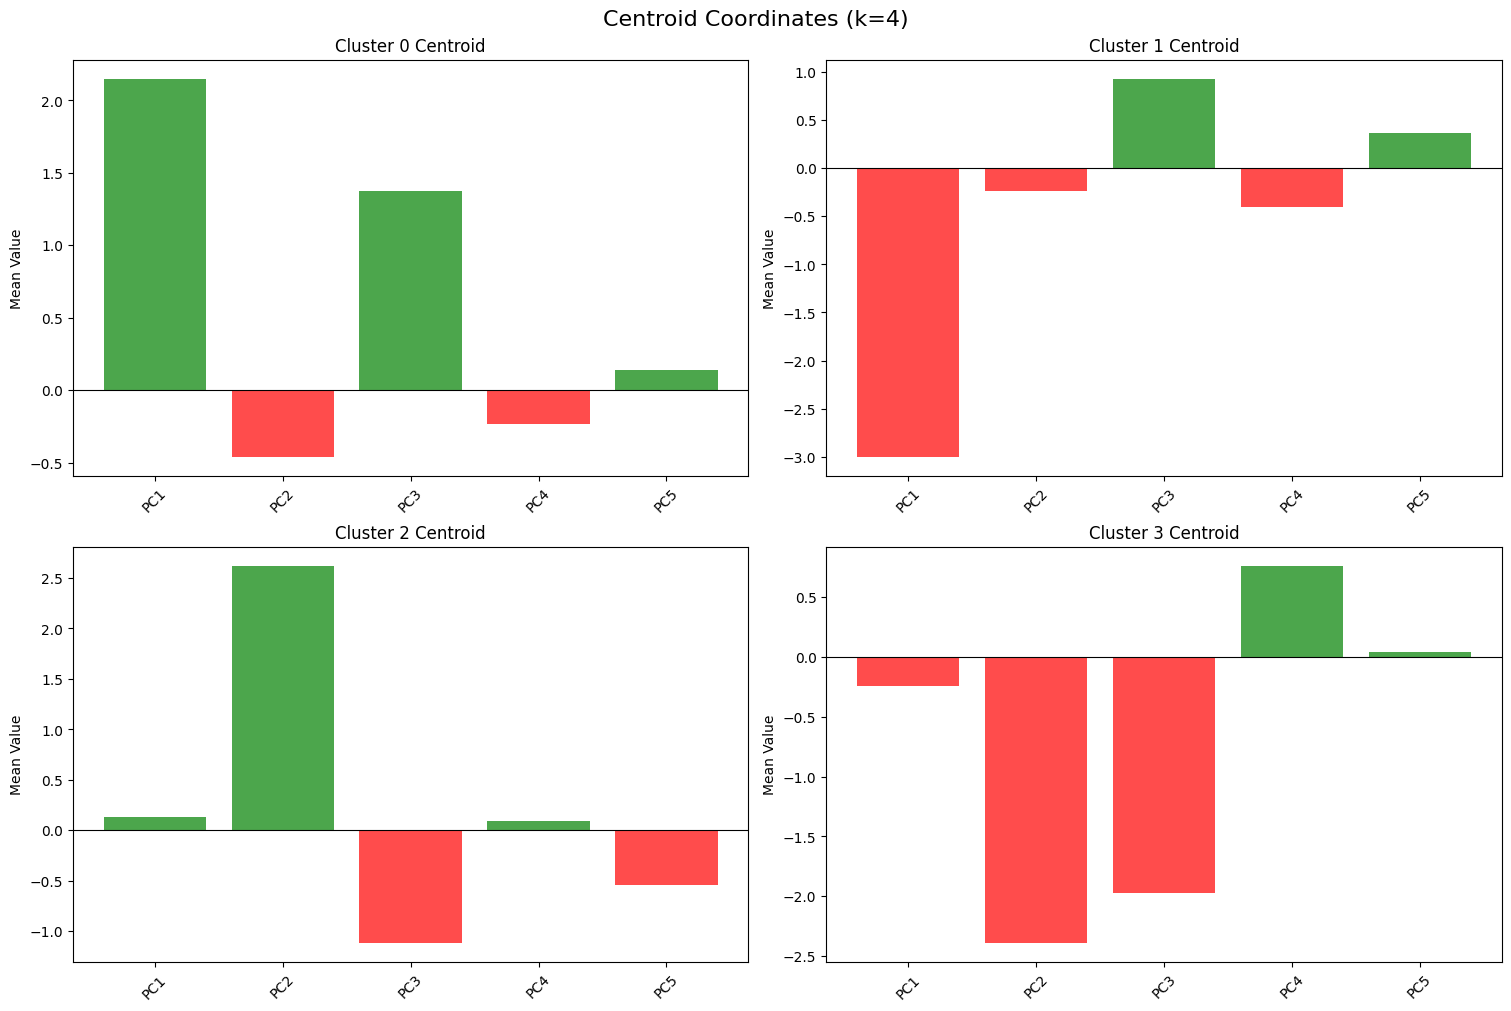

In [69]:
num_features = responses_ft_pca.shape[1]
pc_names = [f"PC{i+1}" for i in range(num_features)]

# Grid setup for subplots
n_cols = 2
n_rows = math.ceil(best_k / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i in range(best_k):
    # Color coding: Green for positive, Red for negative
    values = centroids[i]
    colors = ['green' if x >= 0 else 'red' for x in values]
    
    axes[i].bar(pc_names, values, color=colors, alpha=0.7)
    axes[i].axhline(0, color='black', linewidth=0.8)
    axes[i].set_title(f'Cluster {i} Centroid')
    axes[i].set_ylabel('Mean Value')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if best_k is odd
for j in range(best_k, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Centroid Coordinates (k={best_k})', fontsize=16)
plt.show()

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

...

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.

#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

...


#### Write the code for the visualizations cited in item 2 above:

In [21]:
all_labels = responses_lb.columns
print(cluster_labels)
#print(centroids)
for label in all_labels:
#print(responses_lb_pp['Age'].iloc[0])

    print(f"--- Label {label} ---")
    for i in range(4):
        print(f"--- Cluster {i} ---")
        
        # Create mask and select Age
        mask = (cluster_labels == i)
        cluster_ages = responses_lb.loc[mask, label]
        
        # Count the frequency of each Age
        print(cluster_ages.value_counts().sort_index())
        print("\n")

[1 1 0 1 0 1 2 0 1 3 3 0 2 3 1 1 3 0 3 0 0 1 3 2 3 2 3 2 1 0 1 2 0 0 0 0 1
 2 3 0 0 3 0 1 0 0 1 3 0 2 2 0 2 2 2 1 3 0 2 0 3 0 2 3 1 0 2 3 0 3 1 1 0 0
 1 0 3 1 0 2 2 3 1 3 2 0 0 3 1 1 2 3 1 2 3 3 2 1 0 2 2 0 2 0 1 0 3 0 0 3 1
 3 2 0 2 0 2 3 0 1 0 2 3 0 2 1 1 0 0 2 1 1 0 1 1 1 0 3 2 2 1 3 0 1 0 0 1 2
 2 0 1 1 3 1 2 0 1 0 1 2 0 3 1 0 2 2 2 1 3 1 2 2 2 0 1 0 1 0 0 2 3 0 0 3 2
 2 3 1 0 2 2 0 1 2 2 2 2 1 1 2 0 1 0 0 2 1 1 2 0 0 1 3 2 1 3 2 2 0 0 2 2 0
 0 3 0 0 1 3 1 1 0 2 1 0 0 2 1 1 0 2 3 2 0 1 2 0 0 3 3 3 2 1 2 0 0 0 2 0 2
 0 0 3 1 2 2 3 1 1 0 0 2 2 0 0 1 2 2 3 2 2 2 2 2 3 0 2 0 0 0 0 0 2 2 0 2 3
 1 2 1 3 0 1 0 0 0 3 1 2 1 0 0 0 3 1 2 1 0 3 0 1 2 0 3 0 0 3 0 0 0 0 3 2 0
 1 3 0 3 3 2 1 1 3 1 1 3 3 0 2 2 0 3 1 0 1 3 0 1 2 0 2 0 1 0 3 0 2 0 3 1 2
 3 1 0 2 2 1 0 2 1 1 3 3 0 2 0 0 2 2 1 2 2 1 0 3 1 3 2 0 3 1 0 0 0 3 0 0 1
 1 0 2 2 0 2 3 2 2 2 1 1 0 3 2 2 3 1 2 1 0 0 1 1 1 3 1 2 0 0 3 3 1 0 3 0 2
 3 2 2 0 0 3 3 2 1 1 3 0 0 1 0 0 0 2 0 0 3 0 0 0 3 2 3 1 3 1 2 0 2 1 2 3 1
 0 0 1 0 3 1 2 3 3 0 0 2 

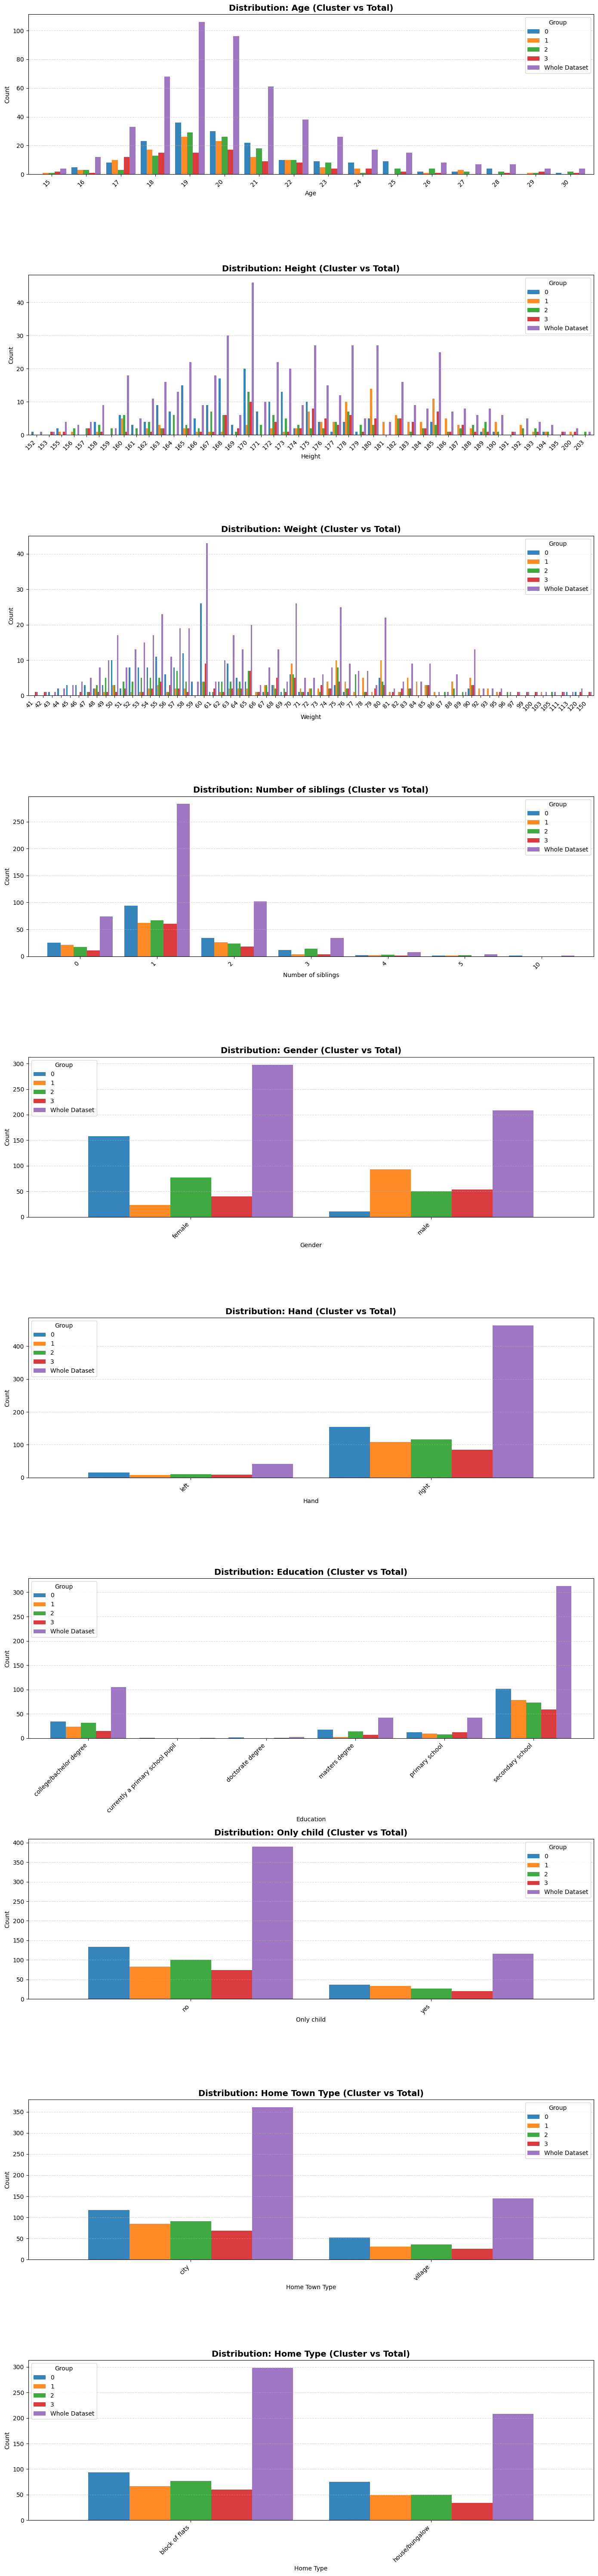

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Impostiamo la figura
n_rows = len(all_labels)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(14, 6 * n_rows))

if n_rows == 1:
    axes = [axes]

# 2. Ciclo su ogni variabile
for i, col_name in enumerate(all_labels):
    ax = axes[i]
    
    # --- STEP A: Creiamo la Crosstab per i Cluster ---
    # Conta quanti elementi ci sono per ogni valore, divisi per cluster
    ct = pd.crosstab(responses_lb[col_name], cluster_labels)
    
    # --- STEP B: Aggiungiamo il 'Whole Dataset' ---
    # Calcoliamo il totale per quella variabile (senza distinzione di cluster)
    total_counts = responses_lb[col_name].value_counts().sort_index()
    
    # Aggiungiamo questa serie come una nuova colonna alla tabella 'ct'
    ct['Whole Dataset'] = total_counts
    
    # --- STEP C: Plotting ---
    # 'width=0.85' rende le barre più spesse per riempire lo spazio
    ct.plot(kind='bar', ax=ax, width=0.85, alpha=0.9)
    
    # Estetica
    ax.set_title(f"Distribution: {col_name} (Cluster vs Total)", fontsize=14, fontweight='bold')
    ax.set_ylabel("Count")
    ax.set_xlabel(col_name)
    
    # Legenda: Spostiamola fuori se copre i dati, o in alto a destra
    ax.legend(title='Group', loc='best')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Ruota etichette asse X per leggibilità
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

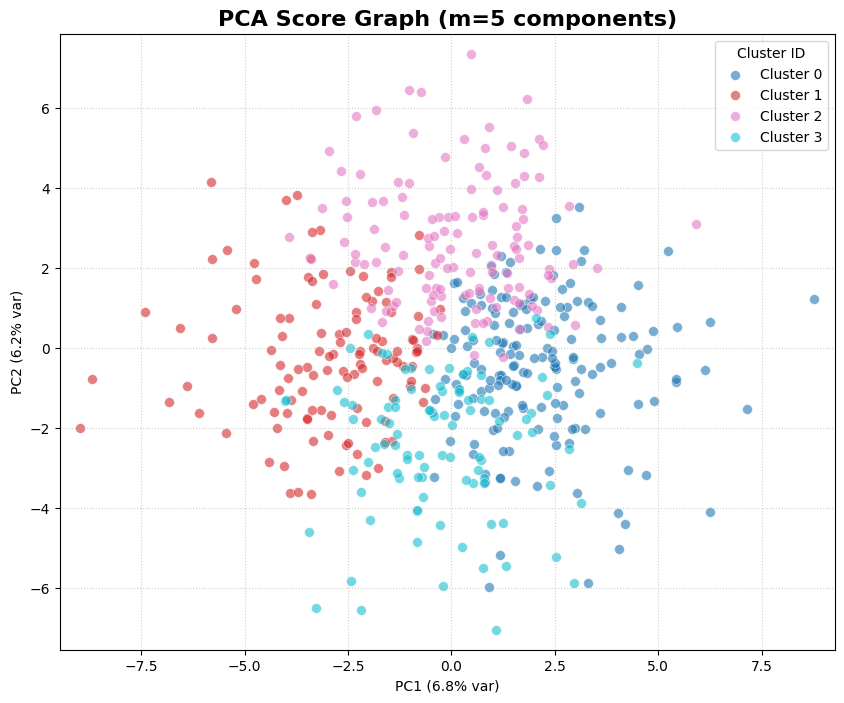

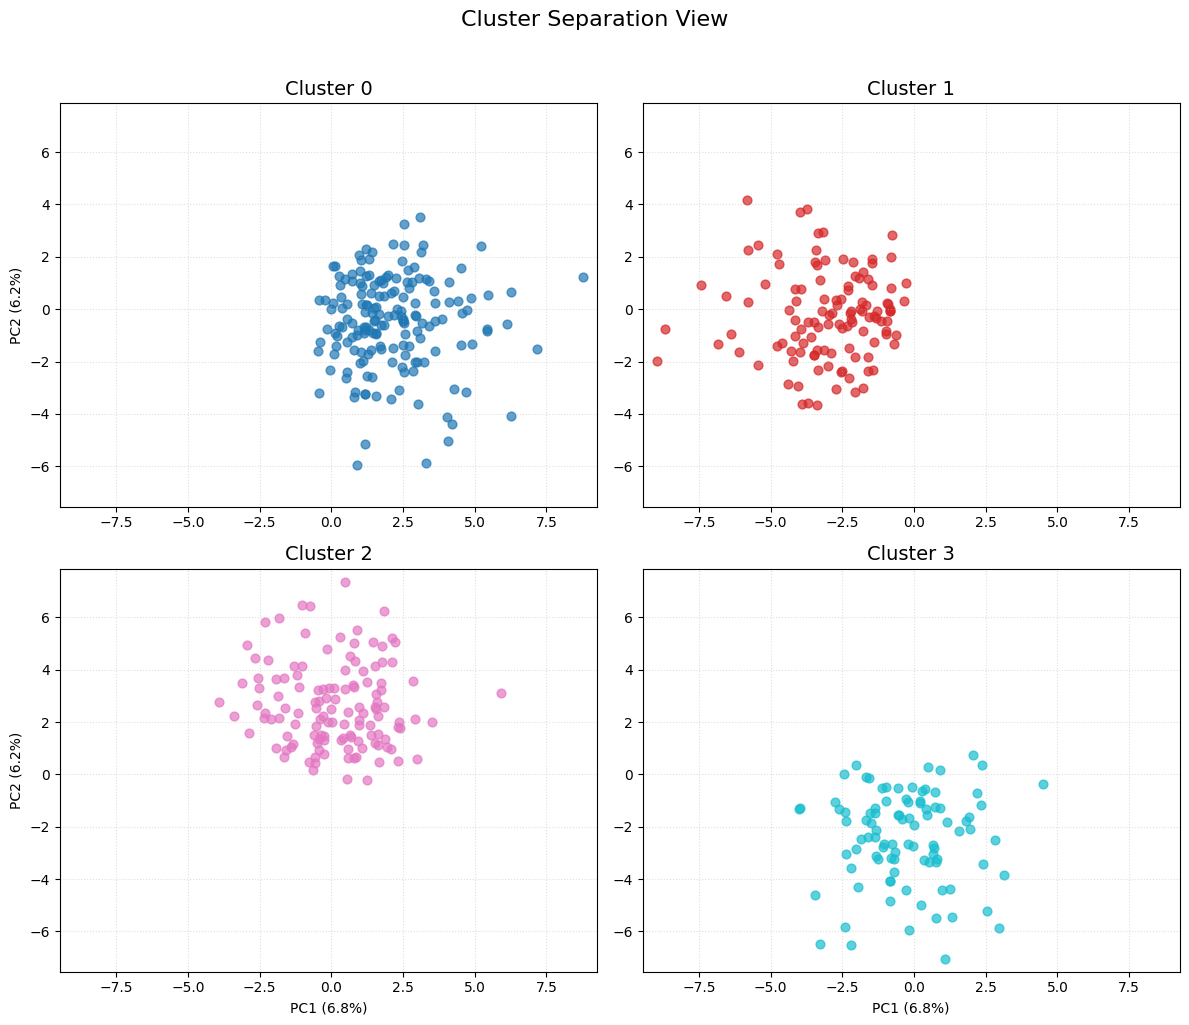

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. PREPARAZIONE DATI
# ---------------------------------------------------------
# Prendiamo le prime 2 colonne, utile nel caso m > 2
X = responses_ft_pp_reduced[:, :2] 

# Assumiamo che tu abbia una variabile con le etichette. 
# Se si chiama diversamente (es. kmeans.labels_), modificala qui:
# cluster_labels = kmeans.labels_ 
if 'cluster_labels' not in locals():
    raise NameError("Attenzione: devi aver definito 'cluster_labels' (le etichette dei gruppi) prima di eseguire questo grafico!")

unique_labels = np.unique(cluster_labels)
n_clusters = len(unique_labels)

# Colormap e limiti assi
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
color_map = dict(zip(unique_labels, colors))

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Recuperiamo la varianza spiegata per le etichette degli assi
var_ratio = pca_reduced.explained_variance_ratio_

# ---------------------------------------------------------
# 2. SCORE GRAPH UNICO
# ---------------------------------------------------------
plt.figure(figsize=(10, 8))

for label in unique_labels:
    mask = (cluster_labels == label)
    plt.scatter(X[mask, 0], X[mask, 1], 
                color=color_map[label], 
                label=f'Cluster {label}', 
                alpha=0.6, s=50, edgecolor='w', linewidth=0.5)

plt.title(f"PCA Score Graph (m={len(var_ratio)} components)", fontsize=16, fontweight='bold')
plt.xlabel(f"PC1 ({var_ratio[0]:.1%} var)")
plt.ylabel(f"PC2 ({var_ratio[1]:.1%} var)")
plt.legend(title="Cluster ID")
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# ---------------------------------------------------------
# 3. SCORE GRAPHS SEPARATI (Split View)
# ---------------------------------------------------------
n_cols = 2
n_rows = int(np.ceil(n_clusters / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n_clusters:
        label = unique_labels[i]
        mask = (cluster_labels == label)
        
        ax.scatter(X[mask, 0], X[mask, 1], 
                   color=color_map[label], 
                   alpha=0.7, s=40)
        
        ax.set_title(f"Cluster {label}", fontsize=14)
        ax.grid(True, linestyle=':', alpha=0.4)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        
        if i % n_cols == 0: ax.set_ylabel(f"PC2 ({var_ratio[1]:.1%})")
        if i >= n_clusters - n_cols: ax.set_xlabel(f"PC1 ({var_ratio[0]:.1%})")
    else:
        ax.axis('off')

plt.suptitle("Cluster Separation View", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):
Based on the plots, the analysis identifies four distinct archetypes driven by gender and cultural interests:

- **Cluster 0** (Mainstream Females): High PC1; characterized by sensitivity, focus on appearance, and pop culture.

- **Cluster 1** (Tech Males): Low PC1; defined by interests in technology, sci-fi, and action/adrenaline.

- **Cluster 2** (The Intellectuals): High PC2; a mixed-gender group passionate for "high culture" (theatre, opera, art exhibitions).

- **Cluster 3** (The Alternative): Low PC3; a mixed-gender group defined by a preference for Metal/Rock music and a rejection of mainstream pop.

Essentially, PC1 acts as a gender divider, while PC2 and PC3 distinguish cultural sub-tribes.


## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

In [30]:

labels_subset = responses_lb.columns
responses_lb_enc = responses_lb

## Preprocessing labels 

# Gender feature
categories_order = [['female',
                     'male']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Gender'] = oe.fit_transform(responses_lb_enc[['Gender']])

# Hand feature
categories_order = [['right', 
                     'left']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Hand'] = oe.fit_transform(responses_lb_enc[['Hand']])

# Education feature
categories_order = [['currently a primary school pupil',
                     'primary school',
                     'secondary school', 
                     'college/bachelor degree', 
                     'masters degree',
                     'doctorate degree']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Education'] = oe.fit_transform(responses_lb_enc[['Education']])

# Only child feature
categories_order = [['no',
                     'yes']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Only child'] = oe.fit_transform(responses_lb_enc[['Only child']])

# Home Town Type feature
categories_order = [['city',
                     'village']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Home Town Type'] = oe.fit_transform(responses_lb_enc[['Home Town Type']])

# Home Type feature
categories_order = [['block of flats',
                     'house/bungalow']]
oe = OrdinalEncoder(categories=categories_order)
responses_lb_enc['Home Type'] = oe.fit_transform(responses_lb_enc[['Home Type']])


In [36]:

responses_lb_pp = scaler.fit_transform(responses_lb_enc)
responses_lb_pp = pd.DataFrame(data=responses_lb_pp, columns=responses_lb_enc.columns)

responses_lb_pp.drop(columns=['Only child', 'Home Town Type','Home Type','Hand', 'Number of siblings'], inplace=True)

In [ ]:
cluster_labels = kmeans_final.predict(responses_lb_pp)
print(cluster_labels)


[0 2 0 2 3 0 1 3 2 2 3 1 0 2 2 2 1 0 0 1 3 0 1 3 3 1 0 3 1 0 0 0 0 3 0 1 2
 3 1 3 0 1 1 3 3 2 1 3 0 3 2 3 2 3 1 2 3 1 0 3 0 0 3 2 2 3 0 2 0 3 1 3 1 0
 2 3 1 0 0 0 0 0 2 1 0 2 2 3 2 2 0 1 0 2 2 1 1 0 2 0 0 1 3 0 0 1 1 2 0 2 2
 1 3 0 3 3 0 3 3 1 0 0 2 0 0 2 2 1 2 3 2 1 0 1 1 2 2 0 3 3 1 0 3 2 3 0 2 2
 1 2 0 2 1 2 0 0 2 0 0 0 0 0 2 0 3 0 1 2 1 0 3 0 0 0 1 3 0 0 3 0 0 0 3 0 1
 3 2 0 0 0 0 3 2 0 3 3 1 2 1 0 1 2 3 1 3 3 2 3 3 3 0 1 0 0 2 1 2 0 3 2 1 3
 3 0 3 1 0 1 2 2 3 1 0 0 0 2 0 2 0 3 3 0 0 1 0 3 0 2 3 0 0 2 1 3 1 0 2 0 3
 1 0 3 2 3 2 1 3 1 0 3 3 3 0 3 2 2 1 2 2 3 3 2 2 2 3 0 2 0 0 1 0 3 3 2 1 0
 2 0 3 1 3 2 0 2 3 0 3 2 2 2 0 3 1 1 3 2 3 3 3 0 2 3 1 3 2 0 1 3 3 0 0 3 0
 0 2 3 0 1 3 2 0 2 2 0 1 3 3 3 2 0 2 2 0 0 0 0 3 2 3 2 0 0 1 2 3 0 3 2 0 0
 2 1 0 1 3 0 0 2 1 2 2 2 3 2 3 2 1 1 1 2 2 0 1 2 2 2 2 3 2 3 3 0 3 2 0 1 2
 1 0 0 3 0 3 2 2 0 0 1 1 3 2 3 0 3 0 0 2 0 2 3 3 1 3 3 3 3 3 2 0 2 3 0 3 0
 0 2 0 0 2 1 0 3 2 3 0 0 1 3 0 1 0 0 0 3 2 1 3 3 2 0 3 1 2 2 2 0 1 0 3 2 2
 0 1 3 1 0 0 0 3 0 1 2 3 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [ ]:
score = silhouette_score(responses_lb_pp, cluster_labels)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.10187865793431894

In [ ]:
cluster_labels==

In [40]:
# Creiamo un DataFrame temporaneo che unisce i punteggi delle PC e le etichette dei cluster
# Assumiamo che 'df_pca' contenga le colonne PC1, PC2, PC3 e 'cluster_labels' siano le etichette trovate dal K-Means
df_analysis = df_pca.copy()
df_analysis['Cluster'] = cluster_labels

# Calcoliamo la media di ogni PC per ogni Cluster
cluster_means_pca = df_analysis.groupby('Cluster').mean()

print("--- Media delle PC per ogni Cluster ---")
print(cluster_means_pca)

# Opzionale: Visualizzazione heatmap per vedere subito le differenze
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_pca, annot=True, cmap='RdBu', center=0)
plt.title('Profilo dei Cluster basato sulle PC')
plt.show()

NameError: name 'df_pca' is not defined

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

...